The model created in this notebook is built to classify whether a news is a fake news or not based on its title. The dataset used in this notebook is [Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv) by CLÉMENT BISAILLON posted on Kaggle. 

Libraries used in this notebook are:
* Tensorflow, for creating deep learning model
* Pandas, to access, load, and manipulate the dataset
* Matplotlib, for visualization

# Download Dataset via Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 71% 29.0M/41.0M [00:00<00:00, 155MB/s]
100% 41.0M/41.0M [00:00<00:00, 158MB/s]


In [ ]:
! unzip fake-and-real-news-dataset.zip

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


# Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Dataset

In [ ]:
df_true = pd.read_csv('/content/True.csv')
df_fake = pd.read_csv('/content/Fake.csv')

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true['label'] = 1
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df_fake['label'] = 0
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df_true.shape

(21417, 5)

In [ ]:
df_fake.shape

(23481, 5)

In [ ]:
df = pd.concat([df_true, df_fake])
df.shape

(44898, 5)

In [ ]:
df.sample(5)

,title,text,subject,date,label
19018,SLEEZY DEMOCRAT SENATOR Caught Fabricating Sto...,Liberal Delaware Sen. Chris Coons caused a sti...,left-news,"Mar 7, 2017",0
2406,"Spicer Confuses Marijuana With Opioids, Vows ...",White House press secretary Sean Spicer said o...,News,"February 23, 2017",0
11503,Two Palestinians killed in anti-US protests af...,GAZA (Reuters) - Israeli troops shot dead at l...,worldnews,"December 22, 2017",1
7825,Panicking Mitch McConnell Says GOP Will Help ...,In the most surreal moment in modern American ...,News,"February 27, 2016",0
6108,Trump moving U.S. toward era of bilateral trad...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"January 23, 2017",1


In [ ]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Split the Dataset

In [ ]:
title = df['title'].values
label = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(title, label, test_size=0.2)

In [ ]:
x_train[:3]

array(["Thailand's political activity ban stays for now: PM",
       'TOMI LAHREN’S Rant Against Anti-Trump Rioters Goes VIRAL: “A Bunch Of Sore Losers Gathered Together Isn’t A Protest, It’s A Tantrum” [VIDEO]',
       'LOL! TRUMP Responds To RACE-OBSESSED Congressman Lewis After Calling Him An “Illegitimate President”…MEDIA ATTACKS “Loathsome” Trump [VIDEO]'],
      dtype=object)

In [ ]:
y_train[:3]

array([1, 0, 0])

# Removing Stopword and Punctuations

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sw_nltk = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in sw_nltk]
    new_text = " ".join(words)
    return new_text

In [ ]:
x_train_without_stopwords = list(map(remove_stopwords, x_train))
print('comparing the length of text before and after stopwords removal')
for i in range(5):
    print(f'{i+1}. previous length : {len(x_train[i])}, after length :{len(x_train_without_stopwords[i])}')

comparing the length of text before and after stopwords removal
1. previous length : 51, after length :47
2. previous length : 140, after length :125
3. previous length : 140, after length :124
4. previous length : 71, after length :71
5. previous length : 64, after length :57


In [ ]:
x_train_without_stopwords[0]

"Thailand's political activity ban stays now: PM"

In [ ]:
def removing_punctuations(sentence):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(sentence)

    return ' '.join(new_words)

In [ ]:
x_train_without_punctuations = list(map(removing_punctuations, x_train_without_stopwords))
print('comparing the length of text before and after removing punctuations')
for i in range(5):
    print(f'{i+1}. previous length : {len(x_train_without_stopwords[i])}, after length :{len(x_train_without_punctuations[i])}')

comparing the length of text before and after removing punctuations
1. previous length : 47, after length :46
2. previous length : 125, after length :119
3. previous length : 124, after length :117
4. previous length : 71, after length :70
5. previous length : 57, after length :57


In [ ]:
x_train_without_punctuations[0]

'Thailand s political activity ban stays now PM'

In [ ]:
x_train = x_train_without_punctuations

In [ ]:
x_train[0]

'Thailand s political activity ban stays now PM'

In [ ]:
len(x_train[0])

46

In [ ]:
import functools
sum_len_of_x_train = functools.reduce(lambda x, y: len(str(x))+len(str(y)), x_train)
sum_len_of_x_train

58

In [ ]:
print(sum_len_of_x_train / len(x_train))

0.0016147892421627039


In [ ]:
y_train[:5]

array([1, 0, 0, 1, 1])

In [ ]:
# y_train = pd.get_dummies(y_train).values.tolist()
# y_train[:5]

In [ ]:
y_test[:5]

array([1, 1, 1, 1, 1])

In [ ]:
# y_test = pd.get_dummies(y_test).values.tolist()
# y_test[:5]

# Tokenizing and Padding

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train) 

In [ ]:
sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
padded_latih = tf.keras.preprocessing.sequence.pad_sequences(
    sekuens_latih,
    padding='post',
    maxlen=15,
    truncating='post'
    ) 

padded_test = tf.keras.preprocessing.sequence.pad_sequences(
    sekuens_test,
    padding='post',
    maxlen=15,
    truncating='post'
    ) 

In [ ]:
padded_latih[:3]

array([[2307,    2,  156, 3764,   84, 4655, 1272,   86,    0,    0,    0,
           0,    0,    0,    0],
       [2011, 1964,    2,  711,   33,    3, 1612,  130,  855,  160, 3954,
        3174, 4397,    1, 1877],
       [ 345,    3, 1040,  153, 2308,  492, 2510,  571, 4967,   15,   27,
         145,    1,    3,    4]], dtype=int32)

In [ ]:
padded_test[:3]

array([[   3,    6,  663, 1297, 4185,   64, 3062,   15,  888, 2284,  925,
        1226, 2920,  148,   18],
       [ 121, 1284, 1508,  979,  522, 2315,  567, 1333,  205,  193,    0,
           0,    0,    0,    0],
       [  14,    9,  494,    1, 2647,  226, 4926,    0,    0,    0,    0,
           0,    0,    0,    0]], dtype=int32)

# Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# define callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        desired_acc = 0.95
        if (val_accuracy > desired_acc) and (accuracy > desired_acc):
            self.model.stop_training = True
            print('desired accuracy reached')

custom_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    mode='min',
    restore_best_weights=True,
    verbose=1
)

In [ ]:
padded_latih = np.array(padded_latih)
y_train = np.array(y_train)
padded_test = np.array(padded_test)
y_test = np.array(y_test)

In [ ]:
num_epochs = 50
history = model.fit(
    padded_latih, 
    y_train, 
    epochs=num_epochs,  
    validation_data=(padded_test, y_test), 
    callbacks=[myCallback(), custom_early_stopping]
    )

Epoch 1/50
1123/1123 [==============================] - 9s 8ms/step - loss: 0.0847 - accuracy: 0.9693 - val_loss: 0.2351 - val_accuracy: 0.9235
Epoch 2/50
1123/1123 [==============================] - 8s 8ms/step - loss: 0.0598 - accuracy: 0.9786 - val_loss: 0.2798 - val_accuracy: 0.9268
Epoch 3/50
1123/1123 [==============================] - 8s 7ms/step - loss: 0.0407 - accuracy: 0.9857 - val_loss: 0.3659 - val_accuracy: 0.9087
Epoch 4/50
1123/1123 [==============================] - 9s 8ms/step - loss: 0.0276 - accuracy: 0.9902 - val_loss: 0.4685 - val_accuracy: 0.9188
Epoch 5/50
1123/1123 [==============================] - 8s 7ms/step - loss: 0.0190 - accuracy: 0.9933 - val_loss: 0.6061 - val_accuracy: 0.9185
Epoch 6/50
1123/1123 [==============================] - 8s 7ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.4684 - val_accuracy: 0.9214
Epoch 7/50
1123/1123 [==============================] - 8s 7ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.4345 - val_accuracy:

# Plot the Result

In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

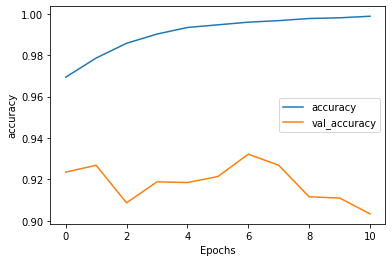

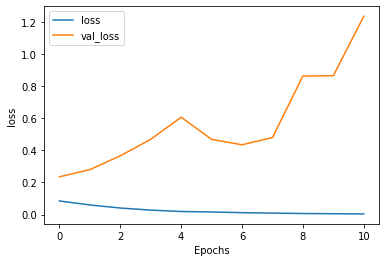

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')